In [1]:
import numpy as np
import matplotlib.pyplot as plt

So the equation we will be using is this:

$z=v_{z}*t-\frac{1}{2}*g*t^{2}$

This can be rewritten in such a way that the first derivative of the position $v_{z}$ is to the left of the equation, like so:

$-v_{z}*t = -\frac{1}{2}*g*t^{2}-z$

(--- ODE notation ---)

$\frac{dz}{dt}*t = \frac{1}{2}*g*t^{2}+z$

$\frac{dz}{dt} = \frac{1}{2}*g*t + \frac{z}{t}$

We know that the initial z-position is 0, and the initial velocity is 10$\frac{m}{s}$, that g is a constant 9.8$\frac{m}{s^{2}}$.

Analytically, we know that the ball will be in the air for __2.041__ seconds, so we can increment t by __0.05__ seconds to see the trajectory over that time period 

### Runge-Kutta Method


In [204]:
def rg4(t, h, z):
    #Zero out the different k values used for correction
    k1 = 0
    k2 = 0
    k3 = 0
    k4 = 0
    
    #Begin assigning those values
    k1=h*f(t,z)
    k2=h*f(t+0.5*h,z+0.5*k1)
    k3=h*f(t+0.5*h,z+0.5*k2)
    k4=h*f(t+h,z+k3)

    #apply these corrections to the original y
    z+=1./6.*(k1+2*k2+2*k3+k4)
    return z

### Function Declaration & Initialization

In [210]:
#z : z[0] --> position, z[1] --> velocity
g=9.8
def f(t, z):
    fv = 10-9.8*t
    return fv

t=0.01
tend = 2.05
h=0.01

tp=[0]
zh=[0]
vz=[10]

z = 10

while(t<tend):
    #Check to see if the time has exceed the maximum, then we can just find an answer close enough
    if((t+h)>tend):
        h=tend-t
    z = rg4(t, h, z) #call the runge-kutta method
    #zh=np.append(zh, z[0]) #append the new height
    vz=np.append(vz, z)
    tp=np.append(tp, t) #save the time
    t=t+h #move up the time
    

### Graph

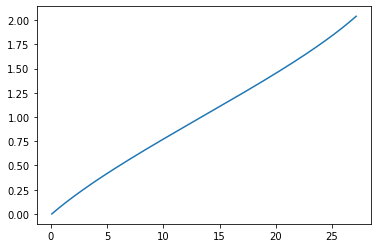

In [213]:
pos = list()
t=0.01
p = 0
for i in vz:
    p += i*t-(1/2)*9.8*t**2
    pos.append(p)
    #t+=0.01
plt.plot(pos, tp)
plt.show()

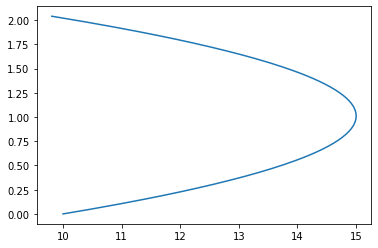

In [214]:
plt.plot(vz, tp)
plt.show()